**Chess Games!**

Investigation in chess openings
CODE1161 2024 - Open Data Project
Sidney Mendez, z5359000



I currently have an elo rating in chess between 700 - 750, which is not that great. 



**What is an elo rating?**
The Elo rating system calculates players' skill levels in competitive games. Your rating change depends on your opponent's rating.

**Objective**
To study 20,000+ chess games on online chess platform lichess.org from 0 to 2300 rated players, to figure out how to surpass a 4-digit elo.

Chess has many complexities, so I’m focusing on improving my opening game. My tough matches often stem from poor positioning in the mid to endgame.

In [1]:
import pandas as pd
from IPython.display import display, HTML

df = pd.read_csv('chess_games.csv')

display(HTML(df.head().to_html()))

,game_id,rated,turns,victory_status,winner,time_increment,white_id,white_rating,black_id,black_rating,moves,opening_code,opening_moves,opening_fullname,opening_shortname,opening_response,opening_variation
0,1,False,13,Out of Time,White,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5 Bf4,D10,5,Slav Defense: Exchange Variation,Slav Defense,NaN,Exchange Variation
1,2,True,16,Resign,Black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6 Qe5+ Nxe5 c4 Bb4+,B00,4,Nimzowitsch Defense: Kennedy Variation,Nimzowitsch Defense,NaN,Kennedy Variation
2,3,True,61,Mate,White,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc6 bxc6 Ra6 Nc4 a4 c3 a3 Nxa3 Rxa3 Rxa3 c4 dxc4 d5 cxd5 Qxd5 exd5 Be6 Ra8+ Ke7 Bc5+ Kf6 Bxf8 Kg6 Bxg7 Kxg7 dxe6 Kh6 exf7 Nf6 Rxh8 Nh5 Bxh5 Kg5 Rxh7 Kf5 Qf3+ Ke6 Bg4+ Kd6 Rh6+ Kc5 Qe3+ Kb5 c4+ Kb4 Qc3+ Ka4 Bd1#,C20,3,King's Pawn Game: Leonardis Variation,King's Pawn Game,NaN,Leonardis Variation
3,4,True,61,Mate,White,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O-O O-O-O Nb5 Nb4 Rc1 Nxa2 Ra1 Nb4 Nxa7+ Kb8 Nb5 Bxc2 Bxc7+ Kc8 Qd2 Qc6 Na7+ Kd7 Nxc6 bxc6 Bxd8 Kxd8 Qxb4 e5 Qb8+ Ke7 dxe5 Be4 Ra7+ Ke6 Qe8+ Kf5 Qxf7+ Nf6 Nh4+ Kg5 g3 Ng4 Qf4+ Kh5 Qxg4+ Kh6 Qf4+ g5 Qf6+ Bg6 Nxg6 Bg7 Qxg7#,D02,3,Queen's Pawn Game: Zukertort Variation,Queen's Pawn Game,NaN,Zukertort Variation
4,5,True,95,Mate,White,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 Nf6 Bg5 O-O b5 Nc5 Bxf6 Bxf6 Bd3 Qd7 O-O Nxd3 Qxd3 c6 a4 cxd5 Nxd5 Qe6 Nc7 Qg4 Nxa8 Bd7 Nc7 Rc8 Nd5 Qg6 Nxf6+ Qxf6 Rfd1 Re8 Qxd6 Bg4 Qxf6 gxf6 Rd3 Bxf3 Rxf3 Rd8 Rxf6 Kg7 Rf3 Rd2 Rg3+ Kf8 c3 Re2 f3 Rc2 Rg5 f6 Rh5 Kg7 Rd1 Kg6 Rh3 Rxc3 Rd7 Rc1+ Kf2 Rc2+ Kg3 h5 Rxb7 Kg5 Rxa7 h4+ Rxh4 Rxg2+ Kxg2 Kxh4 b6 Kg5 b7 f5 exf5 Kxf5 b8=Q e4 Rf7+ Kg5 Qg8+ Kh6 Rh7#,C41,5,Philidor Defense,Philidor Defense,NaN,NaN


**My Opening Strategy as White:**
    
My go-to first move as White is pawn to e4.

Because I heard its good.

However, my moves after 1. e4 tend to be a bit random.

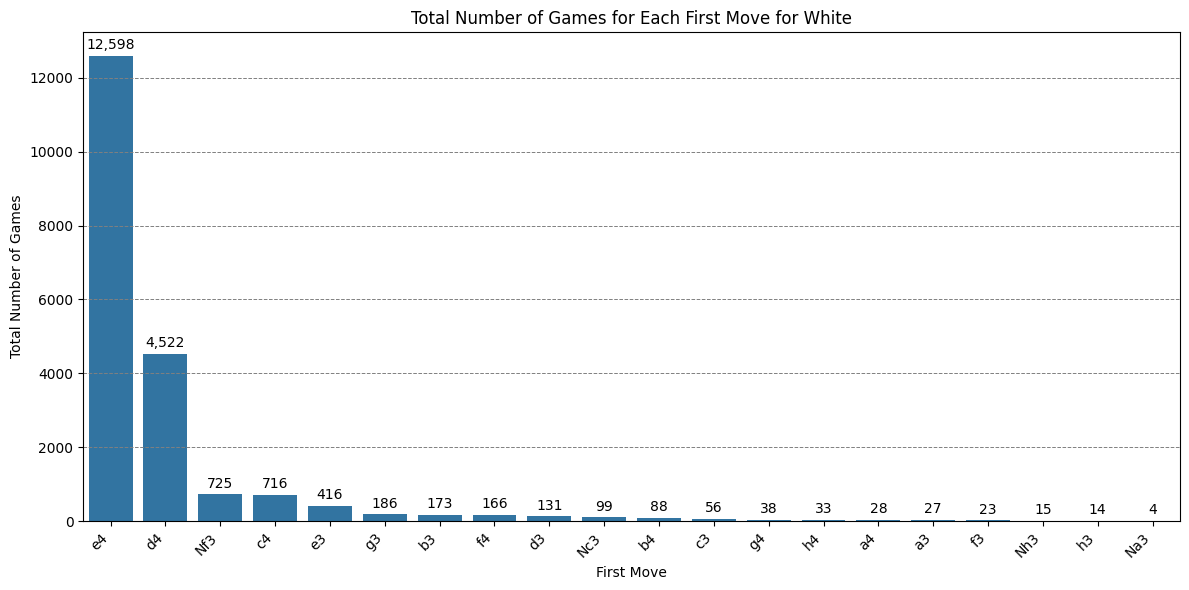

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('chess_games.csv')

df['first_move'] = df['moves'].apply(lambda x: x.split()[0])

total_games_per_move = df['first_move'].value_counts()
total_games_df = total_games_per_move.reset_index()
total_games_df.columns = ['first_move', 'Total Games']

plt.figure(figsize=(12, 6))
ax = sns.barplot(x='first_move', y='Total Games', data=total_games_df)

plt.grid(True, axis='y', linestyle='--', color='gray', linewidth=0.7)

for index, value in enumerate(total_games_df['Total Games']):
    ax.text(index, value + 100, f'{value:,}', ha='center', va='bottom')

plt.xlabel('First Move')
plt.ylabel('Total Number of Games')
plt.title('Total Number of Games for Each First Move for White')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

plt.show()

Since 1. e4 is so popular, does that make it less effective because everyone is doing it?

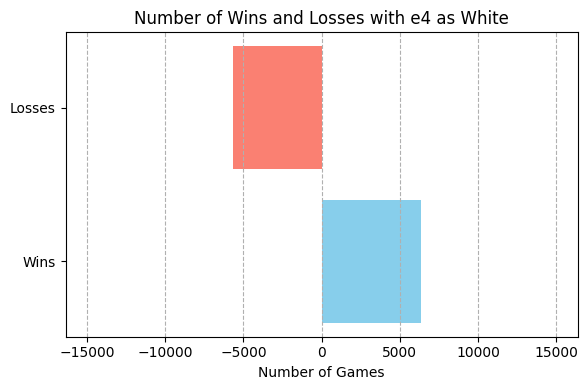

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

e4_games = df[df['moves'].str.startswith('e4')]

e4_wins_as_white = e4_games[e4_games['winner'] == 'White'].shape[0]
e4_losses_as_white = e4_games[e4_games['winner'] == 'Black'].shape[0]

data = {
    'Result': ['Wins', 'Losses'],
    'Count': [e4_wins_as_white, -e4_losses_as_white]  # Losses are made negative for mirroring
}

df_results = pd.DataFrame(data)

plt.figure(figsize=(6, 4))  
plt.barh(df_results['Result'], df_results['Count'], color=['skyblue', 'salmon'])

plt.title('Number of Wins and Losses with e4 as White')
plt.xlabel('Number of Games')
plt.xlim(-max(e4_wins_as_white, e4_losses_as_white) -10000, max(e4_wins_as_white, e4_losses_as_white) + 10000)
plt.grid(True, axis='x', linestyle='--')

plt.tight_layout()
plt.show()

This might due to the fact that white generally wins more games as it has an advantage going first.

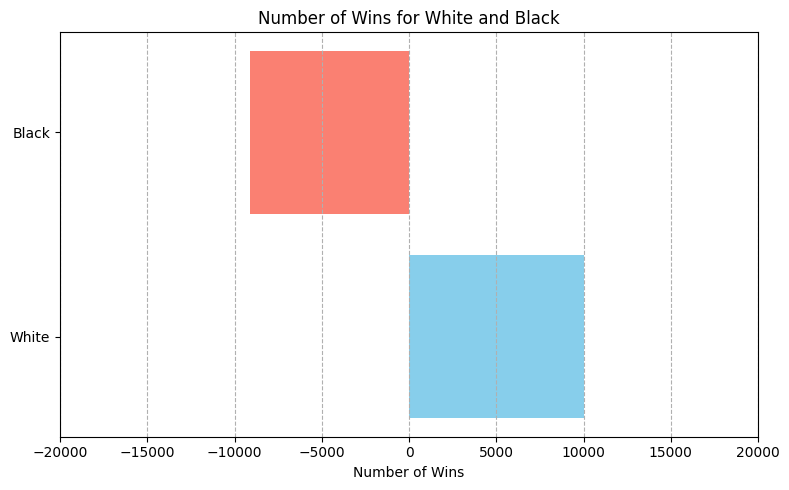

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

white_wins = df[df['winner'] == 'White'].shape[0]
black_wins = df[df['winner'] == 'Black'].shape[0]

data = {
    'Player': ['White', 'Black'],
    'Wins': [white_wins, -black_wins] 
}

df_wins = pd.DataFrame(data)

plt.figure(figsize=(8, 5))
plt.barh(df_wins['Player'], df_wins['Wins'], color=['skyblue', 'salmon'])

plt.title('Number of Wins for White and Black')
plt.xlabel('Number of Wins')
plt.xlim(-max(white_wins, black_wins) - 10000, max(white_wins, black_wins) + 10000) 
plt.grid(True, axis='x', linestyle='--')

plt.tight_layout()
plt.show()


To determine if e4 is less effective, I compared its win rate with the top 10 most used opening moves.

<Figure size 1000x600 with 0 Axes>

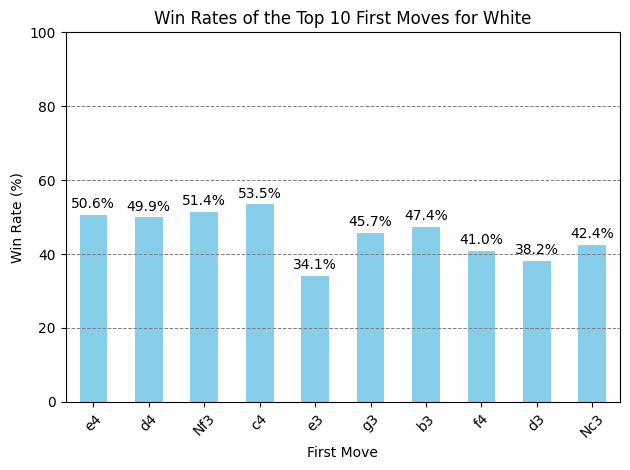

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

df['first_move'] = df['moves'].apply(lambda x: x.split()[0] if pd.notnull(x) else None)
top_10_first_moves = df['first_move'].value_counts().head(10)

win_rates = []

for move in top_10_first_moves.index:
    move_games = df[df['first_move'] == move]
    white_wins = move_games[move_games['winner'] == 'White'].shape[0]
    total_games = move_games.shape[0]
    win_rate = (white_wins / total_games) * 100
    win_rates.append({'First Move': move, 'Win Rate (%)': win_rate})

win_rates_df = pd.DataFrame(win_rates)

most_successful_move = win_rates_df.loc[win_rates_df['Win Rate (%)'].idxmax()]

plt.figure(figsize=(10, 6))
ax = win_rates_df.plot(kind='bar', x='First Move', y='Win Rate (%)', color='skyblue', legend=False)

# Add grid lines
plt.grid(True, axis='y', linestyle='--', color='gray', linewidth=0.7)

for index, row in win_rates_df.iterrows():
    ax.text(index, row['Win Rate (%)'] + 1, f"{row['Win Rate (%)']:.1f}%", ha='center', va='bottom')

plt.title('Win Rates of the Top 10 First Moves for White')
plt.xlabel('First Move')
plt.ylabel('Win Rate (%)')
plt.ylim(0, 100)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

Graph: Despite being popular, 1. e4 has a solid 50.6% win rate. However, Nf3 and c4 have slightly higher win rates.
Further Analysis: I looked at the number of games starting with these three moves (e4, Nf3, c4).

<Figure size 800x500 with 0 Axes>

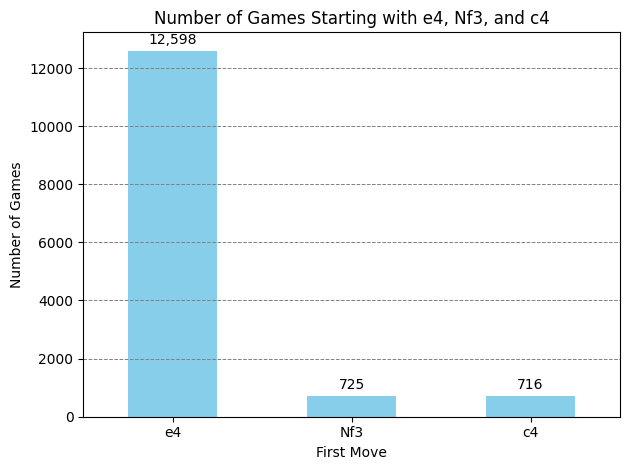

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

df['first_move'] = df['moves'].apply(lambda x: x.split()[0] if pd.notnull(x) else None)

e4_games = df[df['first_move'] == 'e4'].shape[0]
nf3_games = df[df['first_move'] == 'Nf3'].shape[0]
c4_games = df[df['first_move'] == 'c4'].shape[0]

data = {
    'First Move': ['e4', 'Nf3', 'c4'],
    'Number of Games': [e4_games, nf3_games, c4_games]
}
df_moves = pd.DataFrame(data)

plt.figure(figsize=(8, 5))
ax = df_moves.plot(kind='bar', x='First Move', y='Number of Games', color='skyblue', legend=False)

plt.grid(True, axis='y', linestyle='--', color='gray', linewidth=0.7)

for index, row in df_moves.iterrows():
    ax.text(index, row['Number of Games'] + 0.01 * max(df_moves['Number of Games']), 
            f"{row['Number of Games']:,}", ha='center', va='bottom')

plt.title('Number of Games Starting with e4, Nf3, and c4')
plt.xlabel('First Move')
plt.ylabel('Number of Games')
plt.xticks(rotation=0)
plt.tight_layout()

plt.show()

Observation: Nf3 and c4 are less commonly played, which might make their data less reliable, but c4’s 3% higher win rate caught my attention.

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('chess_games.csv')

df['first_move'] = df['moves'].apply(lambda x: x.split()[0] if pd.notnull(x) else None)

c4_games = df[df['first_move'] == 'c4']

c4_wins = c4_games[c4_games['victory_status'] != 'Draw']

most_common_winning_opening = c4_wins['opening_fullname'].value_counts().idxmax()

print(f"The most common winning opening with c4 is: {most_common_winning_opening}")

The most common winning opening with c4 is: English Opening: King's English Variation


Deep Dive into c4 and the English Defense:

Keep in mind 1600 players play 1600 players. etc skill-based matchmaking

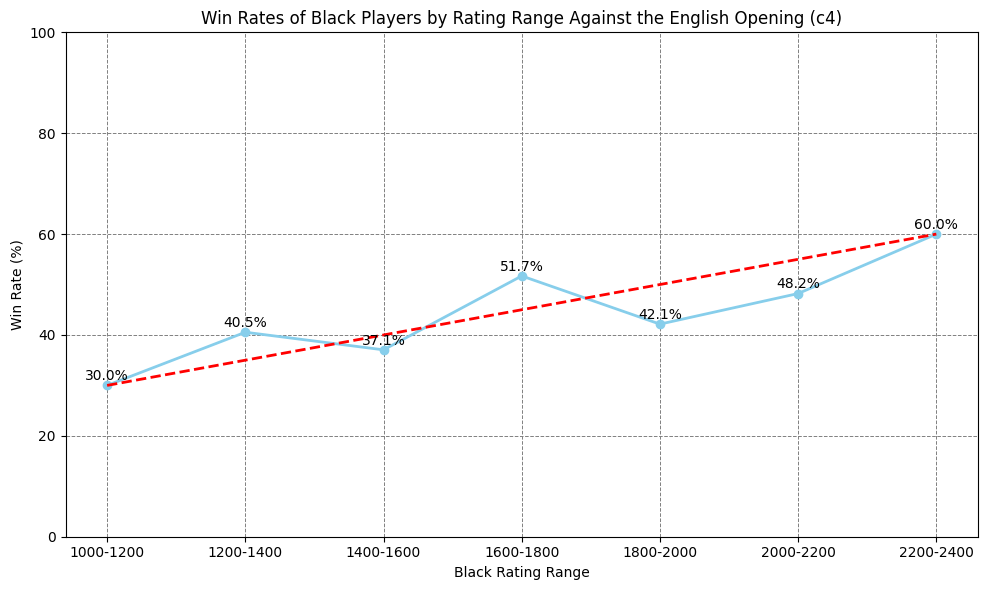

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

c4_games = df[df['moves'].str.startswith('c4')]

rating_ranges = [(1000, 1200), (1200, 1400), (1400, 1600), (1600, 1800), (1800, 2000), (2000, 2200), (2200, 2400)]

results = []

for min_rating, max_rating in rating_ranges:
    range_games = c4_games[(c4_games['black_rating'] >= min_rating) & (c4_games['black_rating'] < max_rating)]
    black_wins = range_games[range_games['winner'] == 'Black'].shape[0]
    total_games = range_games.shape[0]
    win_rate = (black_wins / total_games) * 100 if total_games > 0 else 0
    results.append({'Black Rating Range': f'{min_rating}-{max_rating}', 'Win Rate (%)': win_rate})

win_rate_df = pd.DataFrame(results)

plt.figure(figsize=(10, 6))
plt.plot(win_rate_df['Black Rating Range'], win_rate_df['Win Rate (%)'], marker='o', color='skyblue', linestyle='-', linewidth=2)

plt.plot([win_rate_df['Black Rating Range'].iloc[0], win_rate_df['Black Rating Range'].iloc[-1]],
         [win_rate_df['Win Rate (%)'].iloc[0], win_rate_df['Win Rate (%)'].iloc[-1]],
         linestyle='--', color='red', linewidth=2)

for index, value in enumerate(win_rate_df['Win Rate (%)']):
    plt.text(index, value + 1, f"{value:.1f}%", ha='center', color='Black')

plt.title('Win Rates of Black Players by Rating Range Against the English Opening (c4)')
plt.xlabel('Black Rating Range')
plt.ylabel('Win Rate (%)')
plt.ylim(0, 100)
plt.grid(True, linestyle='--', color='gray', linewidth=0.7)
plt.tight_layout()

plt.show()


**Why the English Defense is so Effective with 1000-1200 rated players:**
Long-Distance Control: The positioning of the pieces allows bishops to exert pressure over long distances.
Surprise Factor: Less common, so opponents may be less prepared.

There is also a spike in wins between the 1600-1800 range, which may be because these players are still competing with lower rating players, then the dip after accounts for the competition being at another level after the 2000 rating. 

Improving My Play as Black:

My Black game is less structured; I often respond reactively.
Since 1. e4 is the most popular first move, I examined the top 10 best responses as Black.

<Figure size 1200x800 with 0 Axes>

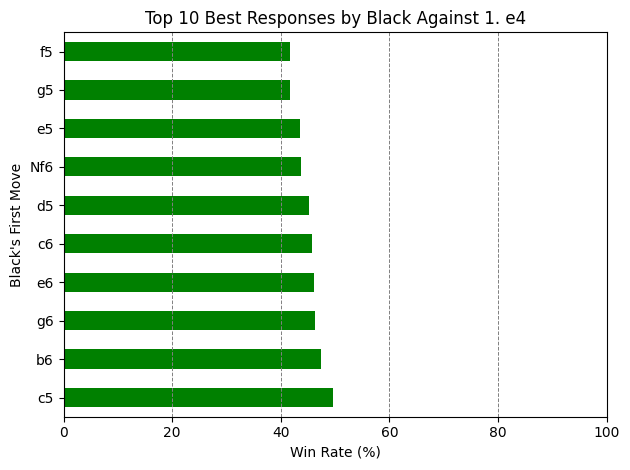

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('chess_games.csv')

df['first_move'] = df['moves'].apply(lambda x: x.split()[0] if pd.notnull(x) else None)
e4_games = df[df['first_move'] == 'e4'].copy()

e4_games.loc[:, 'black_first_move'] = e4_games['moves'].apply(lambda x: x.split()[1] if len(x.split()) > 1 else None)

total_games = e4_games['black_first_move'].value_counts()
black_wins = e4_games[e4_games['winner'] == 'Black']['black_first_move'].value_counts()

win_rate = (black_wins / total_games) * 100

win_rate_df = pd.DataFrame({'Move': win_rate.index, 'Win Rate (%)': win_rate.values}).sort_values(by='Win Rate (%)', ascending=False)

plt.figure(figsize=(12, 8))
ax = win_rate_df.head(10).plot(kind='barh', x='Move', y='Win Rate (%)', color='green', legend=False)

plt.grid(True, axis='x', linestyle='--', color='gray', linewidth=0.7)

plt.title('Top 10 Best Responses by Black Against 1. e4')
plt.xlabel('Win Rate (%)')
plt.ylabel("Black's First Move")
plt.xlim(0, 100)
plt.xticks(rotation=0)
plt.tight_layout()

plt.show()

<Figure size 800x500 with 0 Axes>

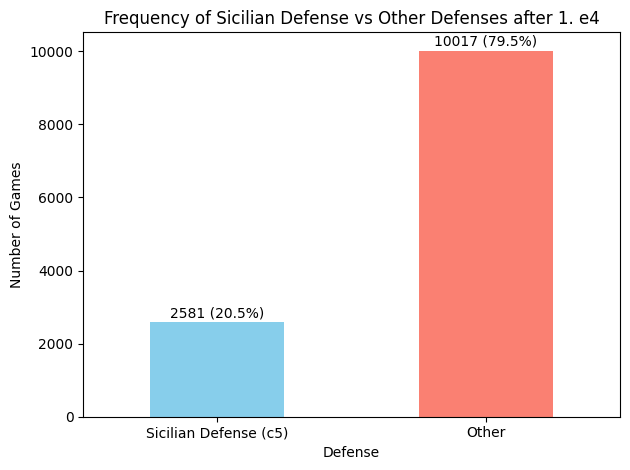

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('chess_games.csv')

# Extract the first move and filter for games starting with 'e4'
df['first_move'] = df['moves'].apply(lambda x: x.split()[0] if pd.notnull(x) else None)
e4_games = df[df['first_move'] == 'e4'].copy()

# Extract Black's first move in response to 'e4'
e4_games['black_first_move'] = e4_games['moves'].apply(lambda x: x.split()[1] if len(x.split()) > 1 else None)

# Count the total number of games and how many times c5 (Sicilian Defense) is used
total_e4_games = e4_games.shape[0]
sicilian_defense_count = e4_games[e4_games['black_first_move'] == 'c5'].shape[0]

# Calculate the percentage of games where the Sicilian Defense is used
sicilian_defense_percentage = (sicilian_defense_count / total_e4_games) * 100

# Prepare data for the bar chart
data = {
    'Defense': ['Sicilian Defense (c5)', 'Other'],
    'Count': [sicilian_defense_count, total_e4_games - sicilian_defense_count]
}

df_defense = pd.DataFrame(data)

# Plot the data
plt.figure(figsize=(8, 5))
ax = df_defense.plot(kind='bar', x='Defense', y='Count', color=['skyblue', 'salmon'], legend=False)

# Add value labels on top of the bars
for index, value in enumerate(df_defense['Count']):
    ax.text(index, value + 50, f"{value} ({value/total_e4_games:.1%})", ha='center', va='bottom')

# Customize the plot
plt.title('Frequency of Sicilian Defense vs Other Defenses after 1. e4')
plt.xlabel('Defense')
plt.ylabel('Number of Games')
plt.xticks(rotation=0)
plt.tight_layout()

# Show the plot
plt.show()


Analysis of the Sicilian Defense:

Frequency: The Sicilian Defense is played 25% of the time, making it a strong and popular response.

<Figure size 1200x800 with 0 Axes>

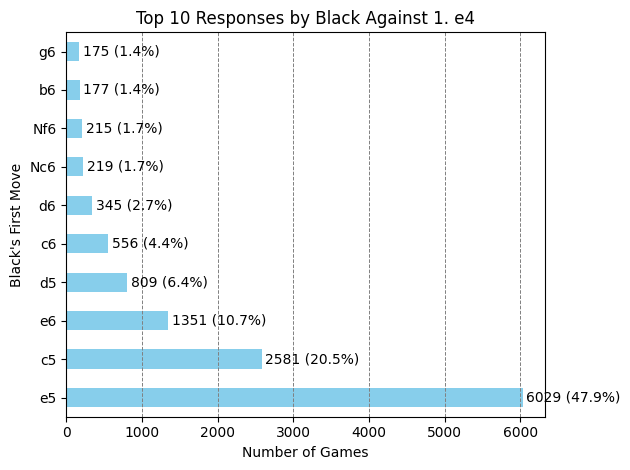

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('chess_games.csv')

df['first_move'] = df['moves'].apply(lambda x: x.split()[0] if pd.notnull(x) else None)
e4_games = df[df['first_move'] == 'e4'].copy()

e4_games['black_first_move'] = e4_games['moves'].apply(lambda x: x.split()[1] if len(x.split()) > 1 else None)

top_10_responses = e4_games['black_first_move'].value_counts().head(10)

top_10_df = top_10_responses.reset_index()
top_10_df.columns = ['Defense', 'Count']

top_10_df['Percentage (%)'] = (top_10_df['Count'] / e4_games.shape[0]) * 100

plt.figure(figsize=(12, 8))
ax = top_10_df.plot(kind='barh', x='Defense', y='Count', color='skyblue', legend=False)

for index, value in enumerate(top_10_df['Count']):
    ax.text(value + 50, index, f"{value} ({top_10_df['Percentage (%)'].iloc[index]:.1f}%)", va='center', color='black')

plt.title('Top 10 Responses by Black Against 1. e4')
plt.xlabel('Number of Games')
plt.ylabel('Black\'s First Move')
plt.tight_layout()

plt.grid(True, axis='x', linestyle='--', color='gray', linewidth=0.7)

plt.show()


Comparison: Although 1... c5 is most successful, 1... e5 remains the most popular response after 1. e4.

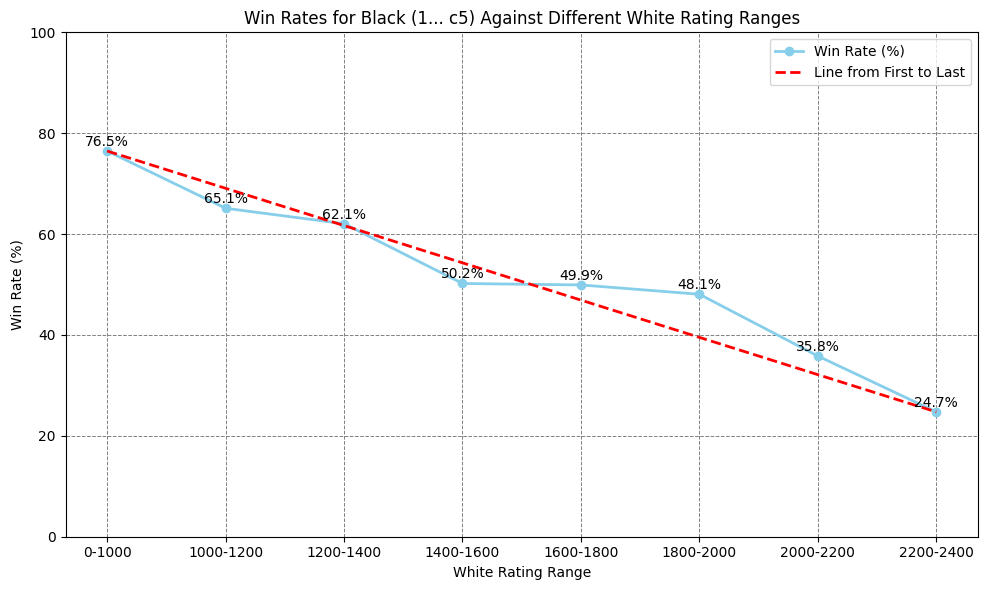

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('chess_games.csv')

df['first_move'] = df['moves'].apply(lambda x: x.split()[0] if pd.notnull(x) else None)
e4_games = df[df['first_move'] == 'e4'].copy()

e4_games.loc[:, 'black_first_move'] = e4_games['moves'].apply(lambda x: x.split()[1] if len(x.split()) > 1 else None)

sicilian_games = e4_games[e4_games['black_first_move'] == 'c5']

rating_ranges = [(0, 1000), (1000, 1200), (1200, 1400), (1400, 1600), (1600, 1800), (1800, 2000), (2000, 2200), (2200, 2400)]

results = []

for min_rating, max_rating in rating_ranges:
    range_games = sicilian_games[(sicilian_games['white_rating'] >= min_rating) & (sicilian_games['white_rating'] < max_rating)]
    black_wins = range_games[range_games['winner'] == 'Black'].shape[0]
    total_games = range_games.shape[0]
    win_rate = (black_wins / total_games) * 100 if total_games > 0 else 0
    results.append({'White Rating Range': f'{min_rating}-{max_rating}', 'Win Rate (%)': win_rate})

win_rate_df = pd.DataFrame(results)

plt.figure(figsize=(10, 6))
plt.plot(win_rate_df['White Rating Range'], win_rate_df['Win Rate (%)'], marker='o', color='skyblue', linestyle='-', linewidth=2, label='Win Rate (%)')

plt.plot([0, len(win_rate_df['White Rating Range']) - 1], 
         [win_rate_df['Win Rate (%)'].iloc[0], win_rate_df['Win Rate (%)'].iloc[-1]], 
         linestyle='--', color='red', linewidth=2, label='Line from First to Last')

for index, value in enumerate(win_rate_df['Win Rate (%)']):
    plt.text(index, value + 1, f"{value:.1f}%", ha='center', color='black')

plt.title('Win Rates for Black (1... c5) Against Different White Rating Ranges')
plt.xlabel('White Rating Range')
plt.ylabel('Win Rate (%)')
plt.ylim(0, 100) 
plt.grid(True, linestyle='--', color='gray', linewidth=0.7)
plt.xticks(rotation=0)
plt.tight_layout()

plt.legend()
plt.show()

Win Rate Analysis: The win rate for 1... c5 declines as the Elo level increases. It remains steady between 1400 and 1800 but dips above 2000.

Again showing that the increased competition is another level at the rating after the 1400-2000 players are perfecting their craft

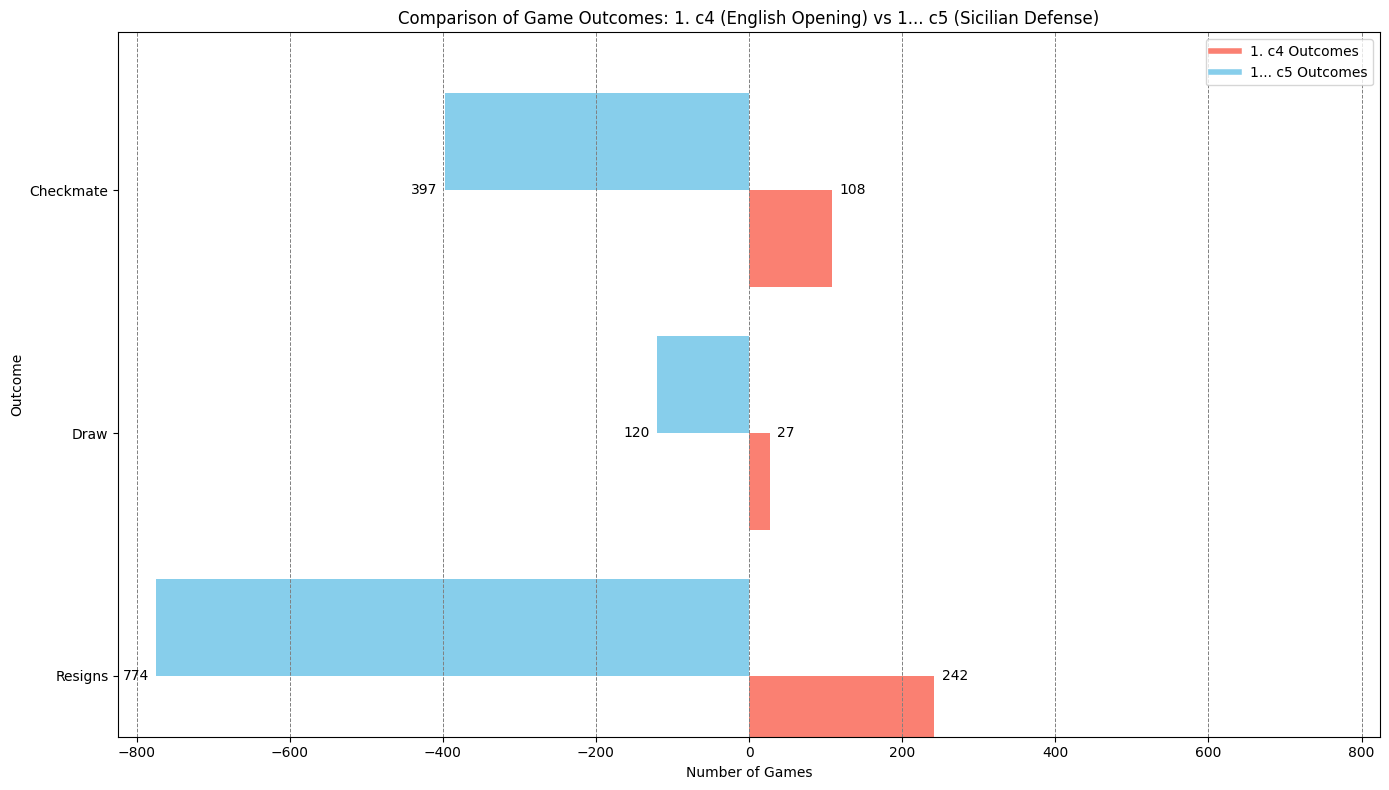

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('chess_games.csv')

df['first_move'] = df['moves'].apply(lambda x: x.split()[0] if pd.notnull(x) else None)
e4_games = df[df['first_move'] == 'e4'].copy()

e4_games.loc[:, 'black_first_move'] = e4_games['moves'].apply(lambda x: x.split()[1] if len(x.split()) > 1 else None)

sicilian_games = e4_games[e4_games['black_first_move'] == 'c5']

white_resigns_c5 = sicilian_games[(sicilian_games['victory_status'] == 'Resign') & (sicilian_games['winner'] == 'Black')].shape[0]
draw_games_c5 = sicilian_games[sicilian_games['victory_status'] == 'Draw'].shape[0]
white_checkmate_c5 = sicilian_games[(sicilian_games['victory_status'] == 'Mate') & (sicilian_games['winner'] == 'Black')].shape[0]

data_c5 = {
    'Outcome': ['White Resigns', 'Draw', 'White Checkmate'],
    'Number of Games': [-white_resigns_c5, -draw_games_c5, -white_checkmate_c5]  # Mirrored values
}

outcome_df_c5 = pd.DataFrame(data_c5)

c4_games = df[df['first_move'] == 'c4']

black_resigns_c4 = c4_games[(c4_games['victory_status'] == 'Resign') & (c4_games['winner'] == 'White')].shape[0]
draw_games_c4 = c4_games[c4_games['victory_status'] == 'Draw'].shape[0]
black_checkmate_c4 = c4_games[(c4_games['victory_status'] == 'Mate') & (c4_games['winner'] == 'White')].shape[0]

data_c4 = {
    'Outcome': ['Black Resigns', 'Draw', 'Black Checkmate'],
    'Number of Games': [black_resigns_c4, draw_games_c4, black_checkmate_c4]
}

outcome_df_c4 = pd.DataFrame(data_c4)

outcome_df_combined = pd.concat([outcome_df_c4, outcome_df_c5])
outcome_df_combined['Position'] = [1, 2, 3, 1, 2, 3]

fig, ax = plt.subplots(figsize=(14, 8))

outcome_df_c4.plot(kind='barh', x='Outcome', y='Number of Games', color='salmon', legend=False, ax=ax, position=1, width=0.4)

outcome_df_c5.plot(kind='barh', x='Outcome', y='Number of Games', color='skyblue', legend=False, ax=ax, position=0, width=0.4)

custom_lines = [plt.Line2D([0], [0], color='salmon', lw=4),
                plt.Line2D([0], [0], color='skyblue', lw=4)]
ax.legend(custom_lines, ['1. c4 Outcomes', '1... c5 Outcomes'], loc='upper right')

ax.set_title('Comparison of Game Outcomes: 1. c4 (English Opening) vs 1... c5 (Sicilian Defense)')
ax.set_xlabel('Number of Games')
ax.set_ylabel('Outcome')
ax.grid(True, axis='x', linestyle='--', color='gray', linewidth=0.7)

max_value = max(outcome_df_c4['Number of Games'].max(), -outcome_df_c5['Number of Games'].min())
ax.set_xlim(-max_value - 50, max_value + 50)

ax.set_yticks([0, 1, 2])
ax.set_yticklabels(['Resigns', 'Draw', 'Checkmate'])

for index, value in enumerate(outcome_df_c4['Number of Games']):
    ax.text(value + 10, index, f"{value}", va='center', ha='left', color='black')
for index, value in enumerate(outcome_df_c5['Number of Games']):
    ax.text(value - 10, index, f"{-value}", va='center', ha='right', color='black')

plt.tight_layout()
plt.show()

**Focus:** To reach a 4-digit Elo, I will:
        - Experiment with less familiar openings to catch opponents off-guard (like an English Opening.
        - Study and consistently use the Sicilian Defense (1... c5) against 1. e4 to leverage my understanding and gain an edge in my current Elo range.